# **Mentautkan sistem ke google drive**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Memanggil library**

In [ ]:
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.layers import Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras. applications.resnet import ResNet50
from sklearn.metrics import confusion_matrix ,accuracy_score,cohen_kappa_score,roc_curve,auc,recall_score,precision_score,f1_score
from keras import optimizers
from tensorflow.keras import optimizers
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
import tensorflow as tf

# **Memasukkan datasets**

In [ ]:
train_path = '/content/drive/My Drive/Portofolio Project/Project 1_Klasifikasi Pneumonia Covid/Dataset/train/'
test_path = '/content/drive/My Drive/Portofolio Project/Project 1_Klasifikasi Pneumonia Covid/Dataset/test/'
num_classes = 3

# **Membuat data latih**

In [ ]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(train_path, target_size=(224,224),color_mode='rgb',batch_size=30,shuffle=True)

Found 390 images belonging to 3 classes.


# **Membuat pemodelan ResNet50**

In [ ]:
model = ResNet50(weight='imagenet', include_top=True)
model.layers.pop()
new_layer = Dense(num_classes, activation='softmax', name='prediction_1')
model = Model(model.input, new_layer(model.layer[-1].output))

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 300, 280, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 306, 286, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 150, 140, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 150, 140, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
sgd = tf.keras.optimizers.legacy.SGD(lr=0.0001,decay=0.0001)
model.compile(sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.97 and logs.get('val_accuracy') > 0.97):
      self.model.stop_training = True

stopTraining = Callback()

# **Melakukan pelatihan model ResNet50**

In [ ]:
history = model.fit_generator(train_batches,epochs=10,verbose=1)

<ipython-input-33-779a946c566c>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_batches,epochs=10,verbose=1)


Epoch 1/10


InvalidArgumentError: ignored

# **Melakukan prediksi data uji**

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_path,batch_size=64,shuffle=False,target_size=(224,224))
predicts_vectors = model.predict_generator(test_generator, verbose=1)

Found 150 images belonging to 3 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


3/3 [==============================] - 24s 7s/step


In [ ]:
pred = np.argmax(predicts_vectors,axis=1)

# **Melakukan validasi hasil prediksi data uji**

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer ()

lb.fit(test_generator.labels)

y_test = lb.transform (test_generator.labels)
y_pred = lb.transform (pred)

auc_score = roc_auc_score(y_test, y_pred,average="macro")

In [ ]:
y_true = test_generator.labels
y_pred = pred

recall = recall_score(y_true, y_pred, average='macro')
precision = precision_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
kappa = cohen_kappa_score(test_generator.labels, pred)
acc = accuracy_score(test_generator.labels, pred)

# **Melihat variabel uji yang akan diprediksi**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(y_true)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# **Melihat hasil prediksi model terhadap variabel uji**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 0 1 1 0 1 2 2 1 1 0
 1 1 1 0 1 1 1 2 2 1 2 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 2 2 1 1 0 2 1 1
 1 1]


# **Evaluasi hasil prediksi model**

In [ ]:
print('>> Result <<')
print('Acc: {}'.format(acc*100))
print('Recall: {}'.format(recall*100))
print('Precision: {}'.format(precision*100))
print('F1-Acore: {}'.format(f1))
print('AUC: {}'.format(auc_score))
print('Kappa: {}'.format(kappa))

>> Result <<
Acc: 31.333333333333336
Recall: 31.33333333333333
Precision: 35.64425770308123
F1-Acore: 0.24667557421899855
AUC: 0.48500000000000004
Kappa: -0.030000000000000027


# **Hasil klasifikasi**
label 0 = Covid;
Label 1 = Pneumonia;
Label 2 = sehat

In [ ]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.32      0.76      0.45        50
           2       0.75      0.18      0.29        50

    accuracy                           0.31       150
   macro avg       0.36      0.31      0.25       150
weighted avg       0.36      0.31      0.25       150



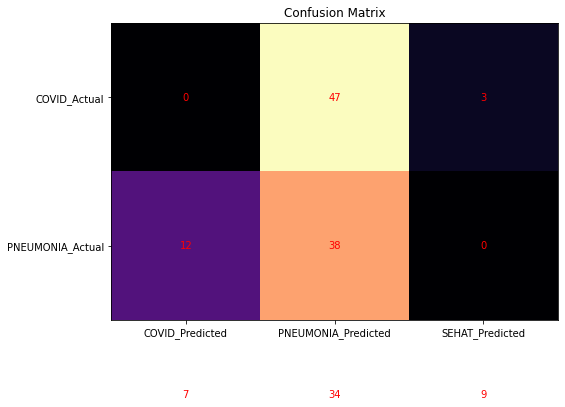

acc: 0.3133
sensitivity: 0.0000
specificity: 0.7600


In [ ]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(y_test.argmax(axis=1), y_pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1] + cm[2,2]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1] + cm[0,2])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1] + cm[1,2])

# Plot Confusion Matrix
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm, cmap='magma')
ax.set_title("Confusion Matrix")
ax.grid(False)
ax.xaxis.set(ticks=(0, 1, 2), ticklabels=('COVID_Predicted', 'PNEUMONIA_Predicted', 'SEHAT_Predicted'))
ax.yaxis.set(ticks=(0, 1, 2), ticklabels=('COVID_Actual', 'PNEUMONIA_Actual', 'SEHAT_Actual'))
ax.set_ylim(1.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))